In [1]:
%matplotlib inline

# week4 day2 : Support Vector Machines 
There is not any tasks in this part, just investigate the codes and relate it with the theory in the lecture

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## 1. generate data samples and plot them

### Think: check the parameter "random_state"

In [3]:
from sklearn.datasets import make_blobs 
# Altenatively, if this doesn't work for you, try: from sklearn.datasets.samples_generator import make_blobs

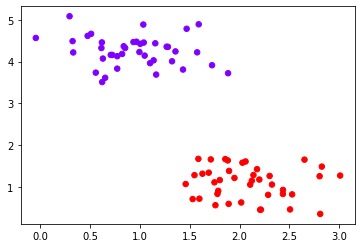

In [4]:
# plot in scatters
X, y = make_blobs(n_samples=80, centers=2,
                  random_state=0, cluster_std=0.40)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow');

### plot different separators

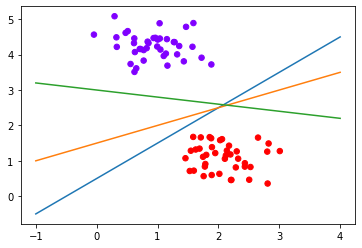

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow');
# in addition to the scatter above, different separators are ploted
x_range = np.linspace(-1, 4) # the range of observation x
for w, b in [(1, 0.5), (0.5, 1.5), (-0.2, 3)]: 
    plt.plot(x_range, w * x_range + b)

 ### draw around each line a margin of some width

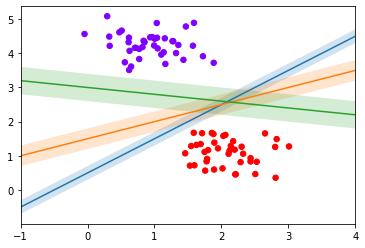

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow');

x_range = np.linspace(-1, 4)
for w, b, d in [(1, 0.5, 0.2), (0.5, 1.5, 0.3), (-0.2, 3, 0.4)]: # w and b are the parameters of a line, d is the width of the margin
    y_fit = w * x_range + b
    plt.plot(x_range, y_fit)
    plt.fill_between(x_range, y_fit - d, y_fit + d, edgecolor='none', alpha=0.2)

plt.xlim(-1, 4);

## 2. train a SVM model on this data, by using Scikit-Learn's support vector classifier

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [7]:
from sklearn.svm import SVC # SVC: Support vector classifier
model = SVC(kernel='linear', C=1e10) # question: what is C ?
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### plot the decision boundary

In [8]:
def plot_decision_boundary_svc(model, ax=None):
    """
    function: Plot the discriminant funciton/decision boundary for a Support vector classifier 
    input: model -> svc model
    output: none
    """
    if ax is None:
        ax = plt.gca()
    x1_range = ax.get_xlim()
    x2_range = ax.get_ylim()
    # create a grid 
    x1 = np.linspace(x1_range[0], x1_range[1], 30) # xlim
    x2 = np.linspace(x2_range[0], x2_range[1], 30) # ylim
    x2,x1 = np.meshgrid(x2,x1)
    x1x2 = np.vstack([x1.ravel(), x2.ravel()]).T
    gx = model.decision_function(x1x2).reshape(x1.shape)
    
    # plot the decision boundary and svm margins
    ax.contour(x1, x2, gx, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot the support vectors   
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=2, facecolors='none', edgecolor='k');


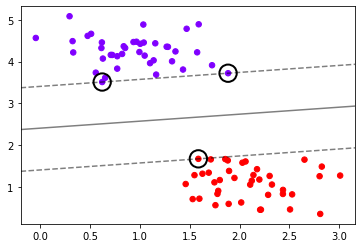

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
plot_decision_boundary_svc(model);

In [10]:
print(model.support_vectors_)

[[1.88417193 3.72204106]
 [0.62115578 3.51146874]
 [1.58601816 1.67511213]]


## Question 1: One of the strengths of the SVM model is its insensitivity to the distant points, can you show that?

## 3. The soft margin

Generate some samples that are not linearly separable

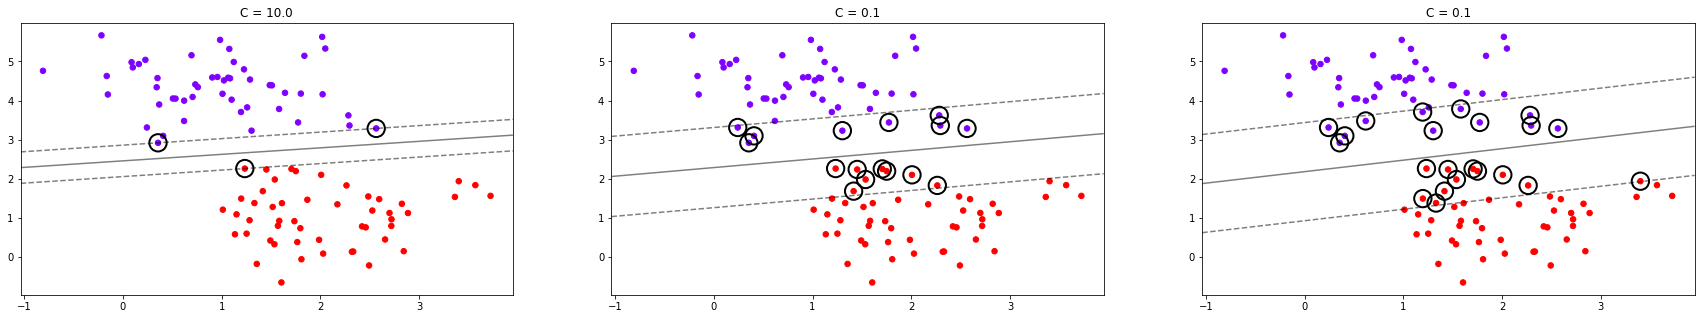

In [11]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, 
                  cluster_std=0.7) # the cluster_std is making a difference when generate the overlapped samples

fig, ax = plt.subplots(1, 3, figsize=(30, 5))
# try different C  
for axi, C in zip(ax, [10.0, 0.1, 0.05]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
    plot_decision_boundary_svc(model, axi)
    axi.set_title('C = {0:.1f}'.format(C))

## Question 2: What is the impact of paramter C?

## 4. SVM kernels

generate some samples that are in circles

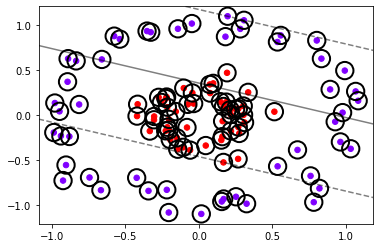

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.3, noise=.1)

model = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
plot_decision_boundary_svc(model);


In [13]:
model2 = SVC(kernel='rbf', C=1E10) # use kernel
model2.fit(X, y)

SVC(C=10000000000.0)

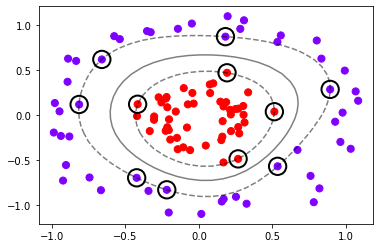

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plot_decision_boundary_svc(model2)
plt.scatter(model2.support_vectors_[:, 0], 
            model2.support_vectors_[:, 1], 
            s=300, facecolors='none');